In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
snail=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
snail

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
### data description

In [4]:
snail.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
### checking null values

In [6]:
snail.isnull().sum().sum()

0

In [7]:
## Co relation

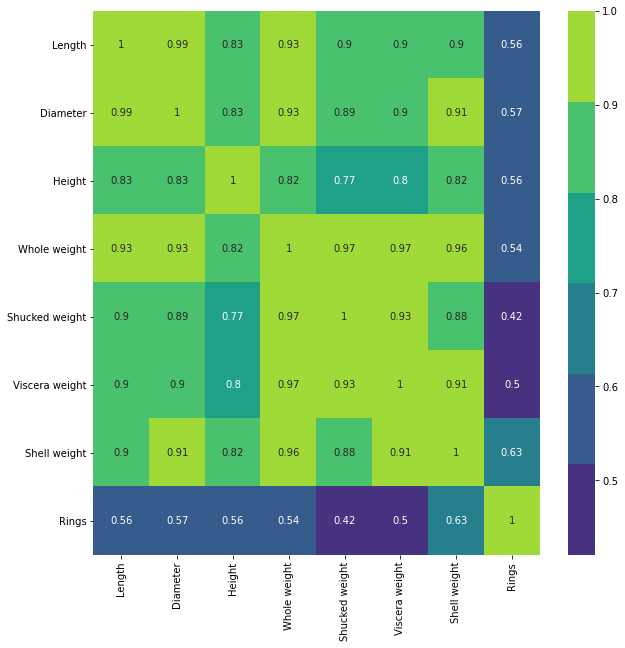

In [8]:
# heat map of cor-relation
plt.figure(figsize=(10, 10))
colormap=sns.color_palette("viridis")

sns.heatmap(snail.corr() ,cmap=colormap ,annot = True)
plt.show()

In [9]:
# univariate analysis

<AxesSubplot:xlabel='Rings', ylabel='count'>

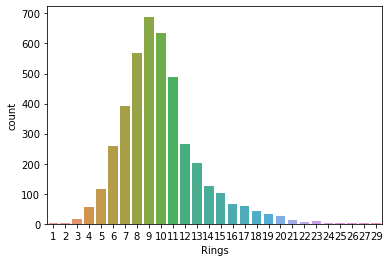

In [10]:
sns.countplot(x='Rings',data=snail)

<AxesSubplot:xlabel='Rings', ylabel='Length'>

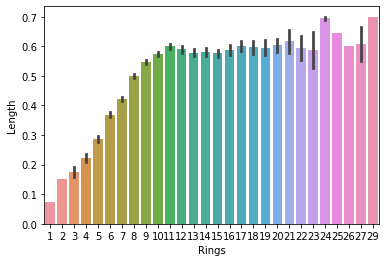

In [11]:
sns.barplot(x='Rings',y='Length',data=snail)

<AxesSubplot:xlabel='Rings', ylabel='Height'>

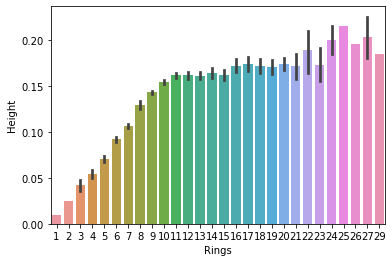

In [12]:
sns.barplot(x='Rings',y='Height',data=snail)

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

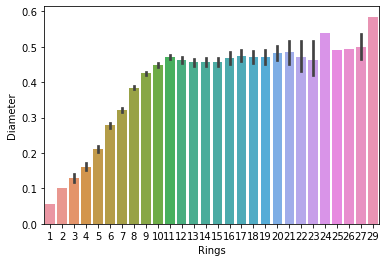

In [13]:
sns.barplot(x='Rings',y='Diameter',data=snail)

<AxesSubplot:xlabel='Rings', ylabel='Shell weight'>

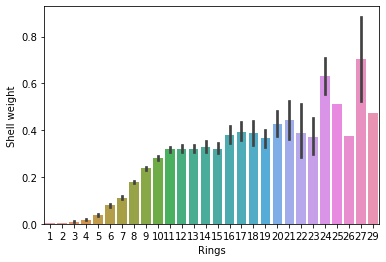

In [14]:
sns.barplot(x='Rings',y='Shell weight',data=snail)

<AxesSubplot:xlabel='Rings', ylabel='Viscera weight'>

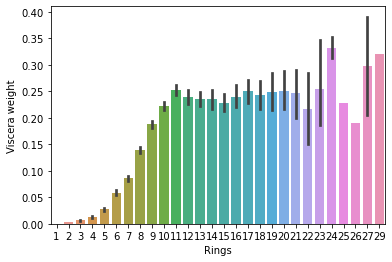

In [15]:
sns.barplot(x='Rings',y='Viscera weight',data=snail)

<AxesSubplot:xlabel='Rings', ylabel='Shucked weight'>

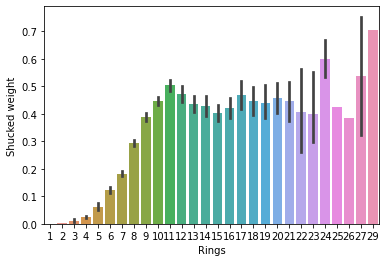

In [16]:
sns.barplot(x='Rings',y='Shucked weight',data=snail)

<AxesSubplot:xlabel='Rings', ylabel='Whole weight'>

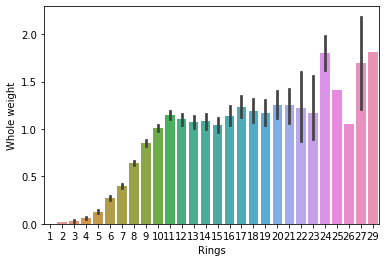

In [17]:
sns.barplot(x='Rings',y='Whole weight',data=snail)

In [18]:
# encoding the SEX column

In [19]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
snail['Sex']=LE.fit_transform(snail['Sex'])

In [20]:
## checking for multi collinearity

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(snail.values, i) 
               for i in range(snail.shape[1])], index=snail.columns)

Sex                 2.563825
Length            702.347884
Diameter          755.416018
Height             43.004758
Whole weight      436.141083
Shucked weight    117.686245
Viscera weight     64.740171
Shell weight       82.562895
Rings              21.652131
dtype: float64

In [22]:
## reducing multi collinearity by scaling

In [23]:
x=snail.drop(['Rings','Sex'],axis=1)
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
model = SC.fit(x)
scaled_x = model.transform(x)

In [24]:
l=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight']
b=0
a=[]
for j in l:
    for i in range(4177):
        x[j][i]=(scaled_x[i][b])
    b=b+1

In [25]:
x['Sex']=0
x['Rings']=0
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,0,0
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,0,0
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,0,0
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0,0
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,0,0
...,...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0,0
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,0,0
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,0,0
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0,0


In [26]:
x['Sex']=snail['Sex']
x['Rings']=snail['Rings']

In [27]:
### multi- collinearity still exist

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(x.values, i) 
               for i in range(x.shape[1])], index=x.columns)

Length             40.773350
Diameter           41.934878
Height              3.570257
Whole weight      110.119039
Shucked weight     29.212383
Viscera weight     17.357589
Shell weight       21.295928
Sex                 2.503688
Rings               2.625771
dtype: float64

In [ ]:
# dropping the column in order to remove multi- collinearity

In [33]:
x=x.drop(['Diameter'], axis = 1)

In [29]:
x=x.drop(['Shucked weight'], axis = 1)

In [34]:
x=x.drop(['Shell weight'], axis = 1)

In [30]:
x=x.drop(['Viscera weight'], axis = 1)

In [38]:
x=x.drop(['Length'], axis = 1)

In [39]:
# again checking VIF score

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(x.values, i) 
               for i in range(x.shape[1])], index=x.columns)

Height          3.091995
Whole weight    3.050106
Sex             2.364162
Rings           2.439293
dtype: float64

In [41]:
# training the model

In [44]:
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
y=snail['Rings']
from sklearn.metrics import r2_score
maxAcc=0
maxRS=0
for i in range(200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=i)
        model=LinearRegression()
        model.fit(x_train,y_train)
        pred= model.predict(x_test)
        acc=r2_score(y_test,pred)
    
        if acc>maxAcc:
            maxAcc=acc
            maxRS=i
            print("R-square",maxAcc,'Random state',i,'test size',j)

R-square 1.0 Random state 0 test size 0.3


In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                  random_state=0)
# Regression model
regressor = LinearRegression()
# Fitting the data to my model
#model = regression.fit(x_train, y_train)
regressor.fit(x_train, y_train)   
LinearRegression()

LinearRegression()

In [46]:
# prediction
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# represtation of values side by side
l=[]
for i in y_test:
    l.append(i)
y_pred['Real Values'] = l

y_pred['Difference'] = y_pred['Predictions']-y_pred['Real Values']

y_pred

,Predictions,Real Values,Difference
0,13.0,13,-7.105427e-15
1,8.0,8,3.552714e-15
2,11.0,11,-1.776357e-15
3,5.0,5,1.065814e-14
4,12.0,12,-5.329071e-15
...,...,...,...
831,11.0,11,-1.776357e-15
832,12.0,12,-5.329071e-15
833,7.0,7,6.217249e-15
834,17.0,17,-1.421085e-14


In [124]:
regressor.score(x_test,y_test)

1.0

In [ ]:
### ridge regression

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
ridge = Ridge()

parameters = {"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

ridge_regression.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [48]:
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 1e-15}
-4.171791128356697e-28


In [49]:
# prediction
ridge_pred = ridge_regression.predict(x_test)
ridge_pred = pd.DataFrame(ridge_pred, columns=['Predictions'])

# represtation of values side by side
l=[]
for i in y_test:
    l.append(i)
ridge_pred['Real Values'] = l

ridge_pred['Difference'] = ridge_pred['Predictions']-ridge_pred['Real Values']

ridge_pred

,Predictions,Real Values,Difference
0,13.0,13,1.065814e-14
1,8.0,8,-3.552714e-15
2,11.0,11,-3.552714e-15
3,5.0,5,-5.329071e-15
4,12.0,12,-5.329071e-15
...,...,...,...
831,11.0,11,-1.776357e-15
832,12.0,12,1.953993e-14
833,7.0,7,-2.664535e-15
834,17.0,17,2.842171e-14


In [50]:
## lasso regression

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regression.fit(x, y)

print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

{'alpha': 1e-08}
-2.1031819195410224e-08


In [52]:
# prediction
lasso_pred = lasso_regression.predict(x_test)
lasso_pred = pd.DataFrame(lasso_pred, columns=['Predictions'])

# represtation of values side by side
l=[]
for i in y_test:
    l.append(i)
lasso_pred['Real Values'] = l

lasso_pred['Difference'] = lasso_pred['Predictions']-lasso_pred['Real Values']

lasso_pred

,Predictions,Real Values,Difference
0,12.999988,13,-0.000012
1,8.000010,8,0.000010
2,11.000038,11,0.000038
3,5.000108,5,0.000108
4,12.000025,12,0.000025
...,...,...,...
831,11.000075,11,0.000075
832,11.999998,12,-0.000002
833,7.000013,7,0.000013
834,16.999951,17,-0.000049


In [ ]:
## got R-squared =1